# Analisis de dataset marketing campaign

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Dataset

In [147]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Analisis de datos

In [148]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [150]:
df.shape

(2240, 29)

In [151]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [152]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [153]:
df = df.dropna()
#see duplicates
df.drop(['ID'], axis=1, inplace=True)



<Axes: xlabel='Income'>

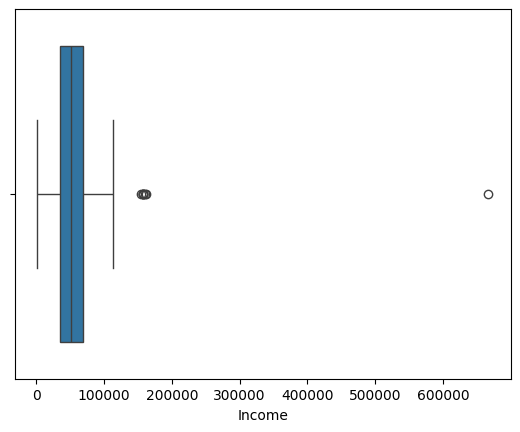

In [155]:

sns.boxplot(data=df,x=df['Income'])


In [156]:
#remove outliers
df = df[df['Income'] < 200000]
df = df[df['MntWines'] < 1200]
df =df[df['MntMeatProducts'] < 1000]
df = df[df['MntSweetProducts'] < 200]
df = df[df['MntGoldProds'] < 250]
df = df[df['NumWebVisitsMonth'] < 15]

In [157]:
df.shape

(2158, 26)

# Transformacion de variables categoricas

In [158]:
#usa label encoder para transformar as variaveis categoricas em numericas
categorical_cols = ['Education', 'Marital_Status']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()



,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,2,4,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,2,4,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,2,5,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,2,5,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,4,3,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


# Transformacion de fecha

In [159]:
#usa la ultima fecha como referencia para calcular el tiempo transcurrido en dias
#sort Dt_Customer by date

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
max_date=df['Dt_Customer'].max()
# calculate the difference between the max date and the date in days
df['Age'] = (max_date.year - df['Year_Birth'])
df['Dt_Customer'] = (max_date - df['Dt_Customer']).dt.days
#calculate the age of the client

df.drop(['Year_Birth'], axis=1, inplace=True)
df.head()



,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,2,4,58138.0,0,0,663,58,635,88,546,...,4,7,0,0,0,0,0,0,1,57
1,2,4,46344.0,1,1,113,38,11,1,6,...,2,5,0,0,0,0,0,0,0,60
2,2,5,71613.0,0,0,312,26,426,49,127,...,10,4,0,0,0,0,0,0,0,49
3,2,5,26646.0,1,0,139,26,11,4,20,...,4,6,0,0,0,0,0,0,0,30
4,4,3,58293.0,1,0,161,94,173,43,118,...,6,5,0,0,0,0,0,0,0,33


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2158 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2158 non-null   int64  
 1   Marital_Status       2158 non-null   int64  
 2   Income               2158 non-null   float64
 3   Kidhome              2158 non-null   int64  
 4   Teenhome             2158 non-null   int64  
 5   Dt_Customer          2158 non-null   int64  
 6   Recency              2158 non-null   int64  
 7   MntWines             2158 non-null   int64  
 8   MntFruits            2158 non-null   int64  
 9   MntMeatProducts      2158 non-null   int64  
 10  MntFishProducts      2158 non-null   int64  
 11  MntSweetProducts     2158 non-null   int64  
 12  MntGoldProds         2158 non-null   int64  
 13  NumDealsPurchases    2158 non-null   int64  
 14  NumWebPurchases      2158 non-null   int64  
 15  NumCatalogPurchases  2158 non-null   int64 

# Analisis de correlacion

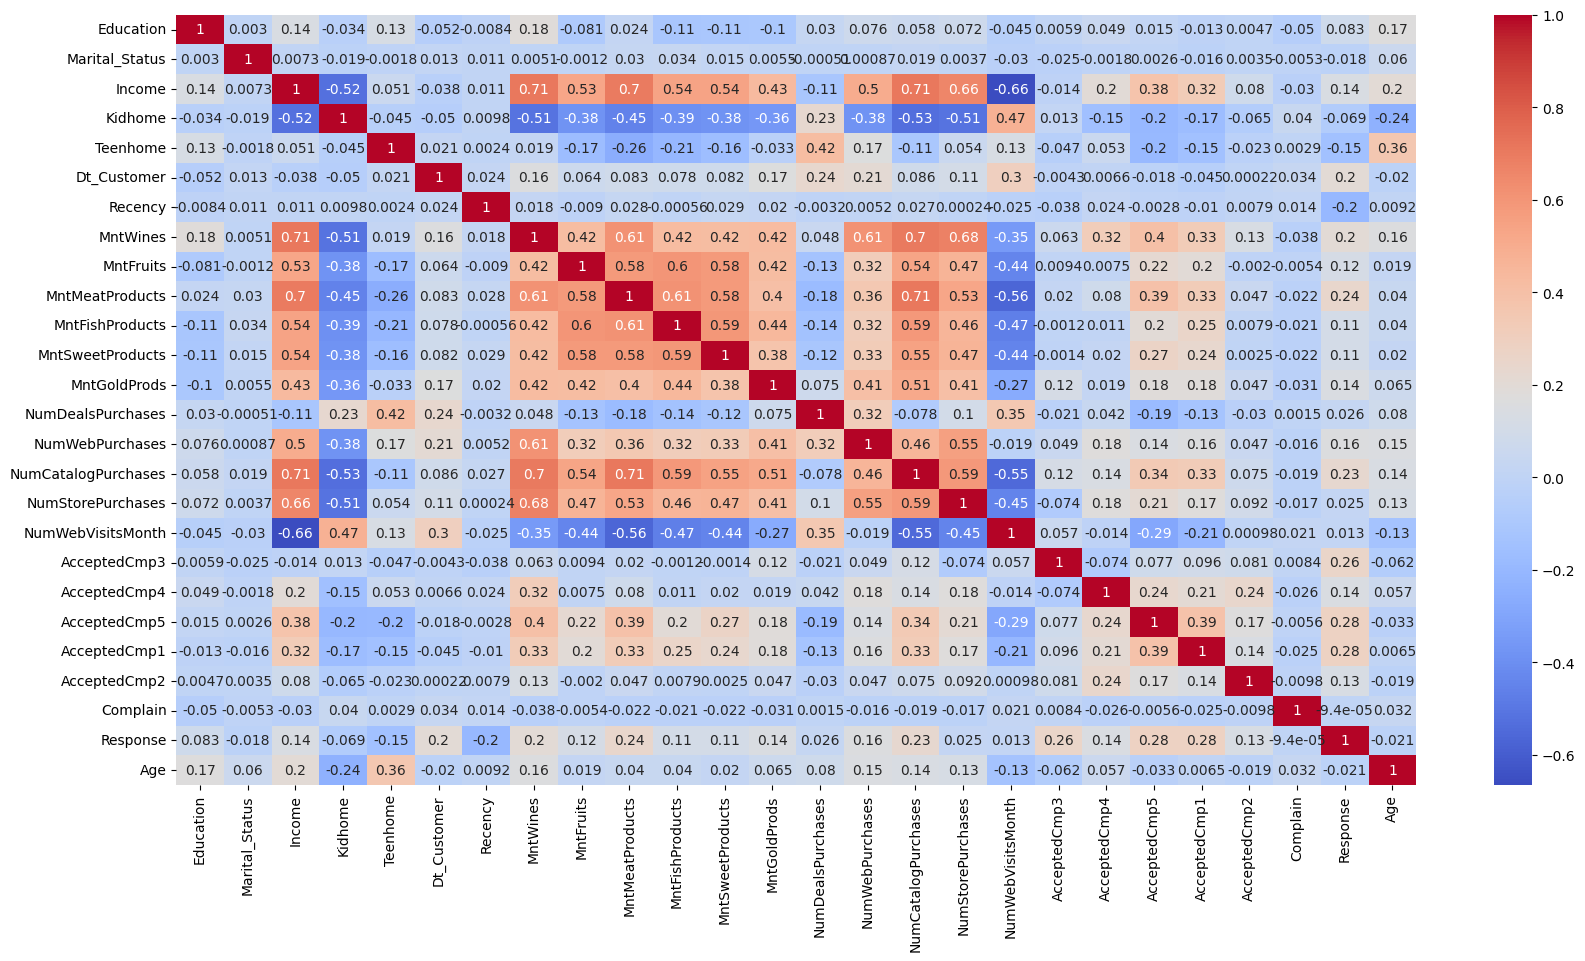

In [161]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Escalamiento de datos

In [162]:
#use standard scaler to scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,-0.334701,0.256116,0.321412,-0.835359,-0.935993,1.536097,0.308583,1.131618,1.543315,1.805727,...,-0.556431,0.732394,-0.281069,-0.264397,-0.255251,-0.250062,-0.099131,-0.099131,2.446185,0.996378
1,-0.334701,0.256116,-0.245585,1.021186,0.906957,-1.180218,-0.382853,-0.893190,-0.635577,-0.724292,...,-1.175069,-0.134587,-0.281069,-0.264397,-0.255251,-0.250062,-0.099131,-0.099131,-0.408800,1.247734
2,-0.334701,1.183460,0.969223,-0.835359,-0.935993,-0.197406,-0.797714,0.453437,0.566570,-0.157380,...,1.299485,-0.568077,-0.281069,-0.264397,-0.255251,-0.250062,-0.099131,-0.099131,-0.408800,0.326095
3,-0.334701,1.183460,-1.192566,1.021186,-0.935993,-1.051811,-0.797714,-0.893190,-0.560443,-0.658699,...,-0.556431,0.298903,-0.281069,-0.264397,-0.255251,-0.250062,-0.099131,-0.099131,-0.408800,-1.265827
4,1.448718,-0.671229,0.328864,1.021186,-0.935993,-0.943158,1.553167,-0.367518,0.416302,-0.199547,...,0.062208,-0.134587,-0.281069,-0.264397,-0.255251,-0.250062,-0.099131,-0.099131,-0.408800,-1.014471


# PCA

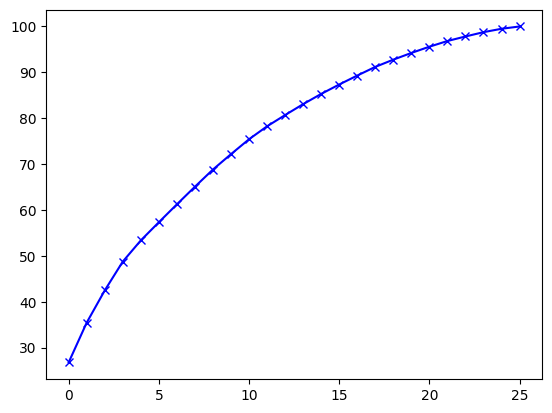

In [164]:
#use pca
pca = PCA()
pca.fit(scaled_df)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(var1,'bx-')
plt.show()



In [165]:
# me quedo con el 90% de la varianza
pca = PCA(n_components=0.9)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)
pca_df = pd.DataFrame(pca_df)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,4.021388,0.547504,0.966634,-2.550311,-0.718499,0.456644,-1.003929,-0.205065,-0.720376,0.369544,-1.633176,0.979785,1.371323,-0.467203,0.500398,0.569329,-1.210514,-0.263901
1,-2.409701,-0.320670,-0.940784,1.284925,-0.620749,0.449067,-0.120769,0.274427,0.856900,-0.845796,-0.308103,0.691761,-0.073775,-0.454121,0.136050,0.154129,-0.013887,0.365890
2,1.791941,-0.144753,-1.038670,-0.230274,-0.077927,0.043030,-1.250381,0.393646,0.531952,0.594069,0.624947,-0.775907,0.310209,0.756682,-0.395753,0.893731,-0.703430,-0.040849
3,-2.645320,-1.529419,0.131844,-0.087906,0.210845,-0.209476,-1.167082,0.153301,0.393144,-0.229312,1.395264,-0.265352,0.041837,0.250703,0.099182,0.158882,-0.192679,0.017440
4,-0.360503,-0.000673,-0.417041,-0.097836,0.646491,-0.993407,0.971512,-1.088538,-1.537334,-0.394596,1.652920,1.092867,0.707680,-0.129660,0.402716,0.227452,-0.391196,-0.193047


# Clustering

## K-means (con PCA)

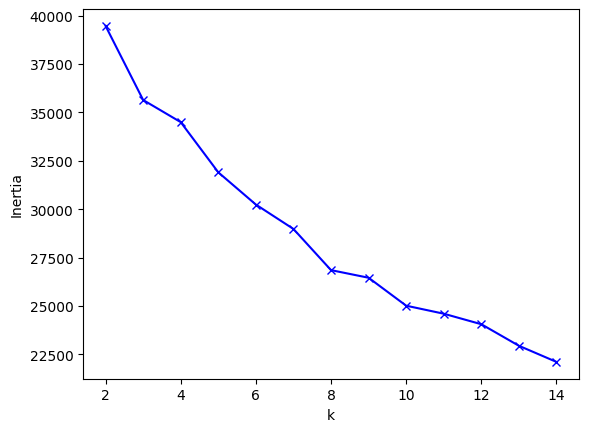

In [166]:
sum_squared_distances = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k, n_init='auto',random_state=42)
  km = km.fit(pca_df)
  sum_squared_distances.append(km.inertia_)

plt.plot(K,sum_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()




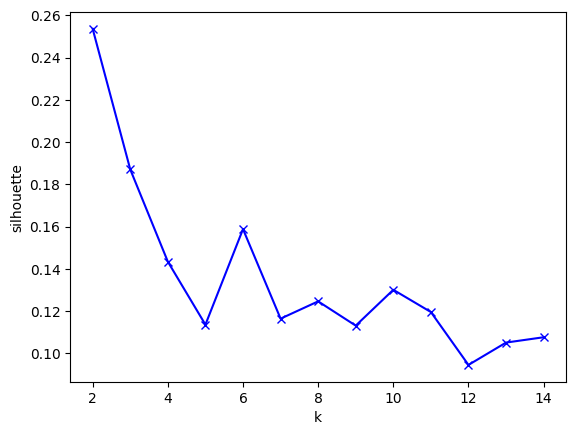

In [167]:
silhouette_scores = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k, n_init='auto',random_state=42)
  km = km.fit(pca_df)
  y = km.predict(pca_df)
  silhouette_scores.append(silhouette_score(pca_df,y))

plt.plot(K,silhouette_scores,'bx-')
plt.xlabel('k')
plt.ylabel('silhouette')
plt.show()


In [168]:
km = KMeans(n_clusters=2,n_init='auto',random_state=42) 
y_predict_k = km.fit_predict(pca_df)
print(silhouette_score(pca_df,y_predict_k))
df['k_means_pca'] = y_predict_k

0.2535549906398375


## K-means (sin PCA)

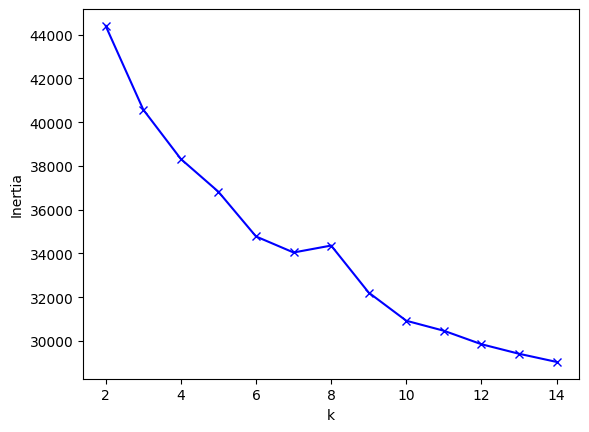

In [174]:
# kmeans sin pca
sum_squared_distances = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k, n_init='auto',random_state=0)
  km = km.fit(scaled_df)
  sum_squared_distances.append(km.inertia_)
plt.plot(K,sum_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

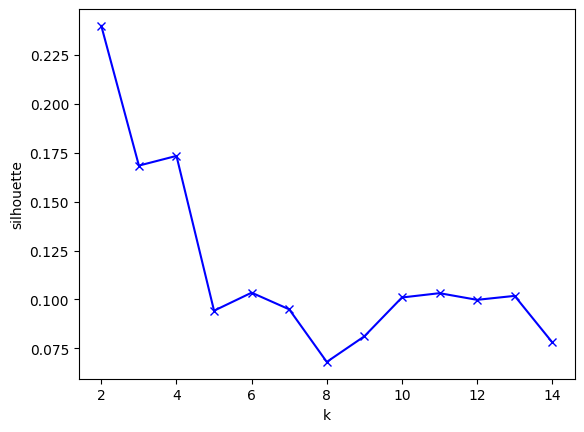

In [175]:
silhouette_scores = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k, n_init='auto',random_state=0)
  km = km.fit(scaled_df)
  y = km.predict(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df,y))
plt.plot(K,silhouette_scores,'bx-')
plt.xlabel('k')
plt.ylabel('silhouette')
plt.show()


In [171]:
km = KMeans(n_clusters=2,n_init='auto',random_state=42)
y_predict_k = km.fit_predict(scaled_df)
print(silhouette_score(scaled_df,y_predict_k))
df['k_means'] = y_predict_k


0.23984259338080585


## Hierarchical Clustering (con PCA)

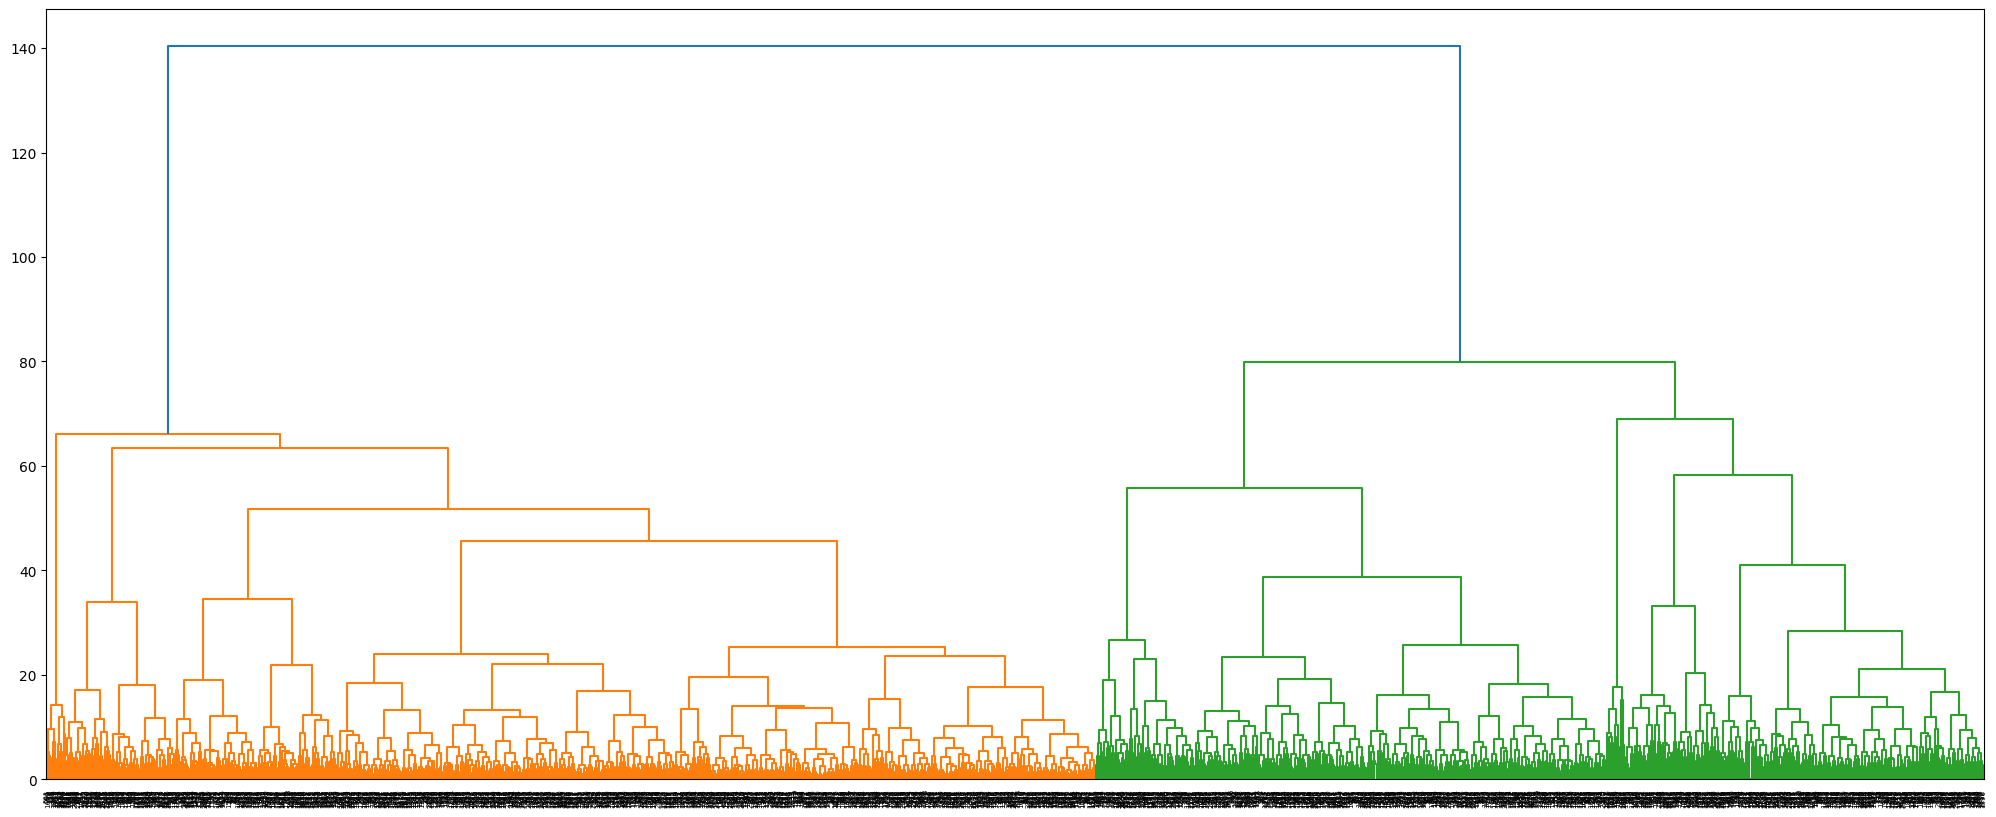

In [172]:
# hierarchial clustering con pca
Z = linkage(pca_df,'ward')
plt.figure(figsize=(25,10))
dendrogram(Z)
plt.show()


In [173]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_predict_hc = hc.fit_predict(pca_df)
print(silhouette_score(pca_df,y_predict_hc))
df['hierarchial_pca'] = y_predict_hc

0.20505491961248506


## Hierarchical Clustering (sin PCA)

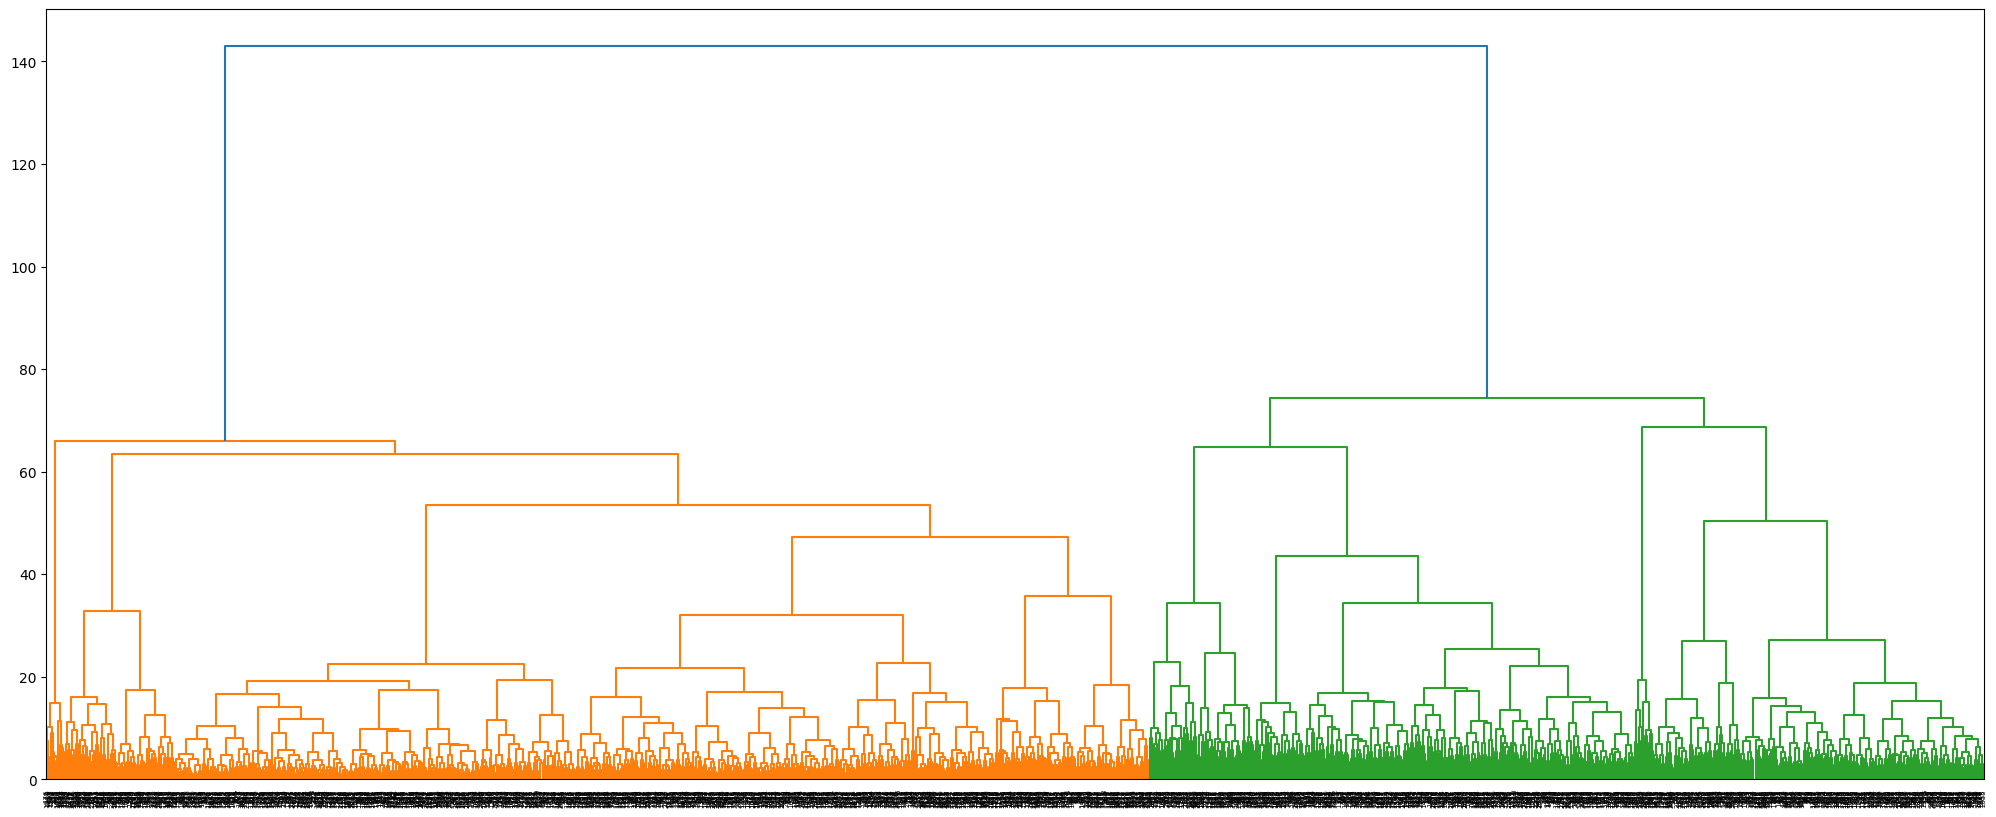

In [104]:
Z = linkage(scaled_df,'ward')
plt.figure(figsize=(25,10))
dendrogram(Z)
plt.show()


In [110]:
pca_df.shape

(2158, 18)

In [108]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_predict_hc = hc.fit_predict(scaled_df)
print(silhouette_score(scaled_df,y_predict_hc))
df['hierarchial'] = y_predict_hc


0.20423373207289397


## DBSCAN (con PCA)

In [126]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(pca_df)
distances, indices = nbrs.kneighbors(pca_df)


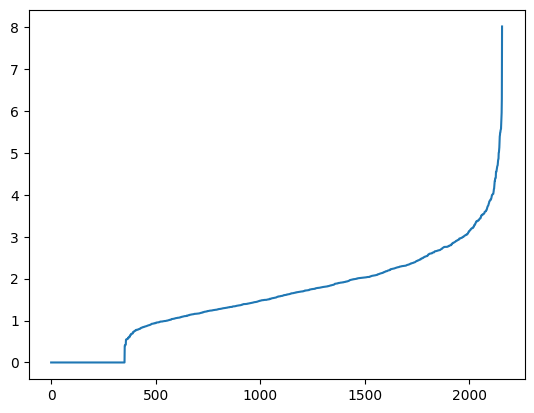

In [127]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [134]:
eps_values = np.arange(1,4,0.2)
min_samples = np.arange(3,12)

In [135]:
from itertools import product
dbscan_paramns = list(product(eps_values,min_samples))
sil_scores = []
n_clusters=[]
for p in dbscan_paramns:
  y_pred = DBSCAN(eps = p[0], min_samples=p[1]).fit_predict(pca_df)
  try:
    sil_scores.append(silhouette_score(pca_df,y_pred))

  except:
    sil_scores.append(0)
  n_clusters.append(len(np.unique(y_pred)))

In [136]:
df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns,columns=['Eps','Min_samples'])
df_paramns_tunning['sil_scores'] = sil_scores
df_paramns_tunning['n_clusters'] = n_clusters
df_best = df_paramns_tunning.copy()
df_best[(df_best['sil_scores']==df_best['sil_scores'].max()) ]


,Eps,Min_samples,sil_scores,n_clusters
117,3.6,3,0.126659,18


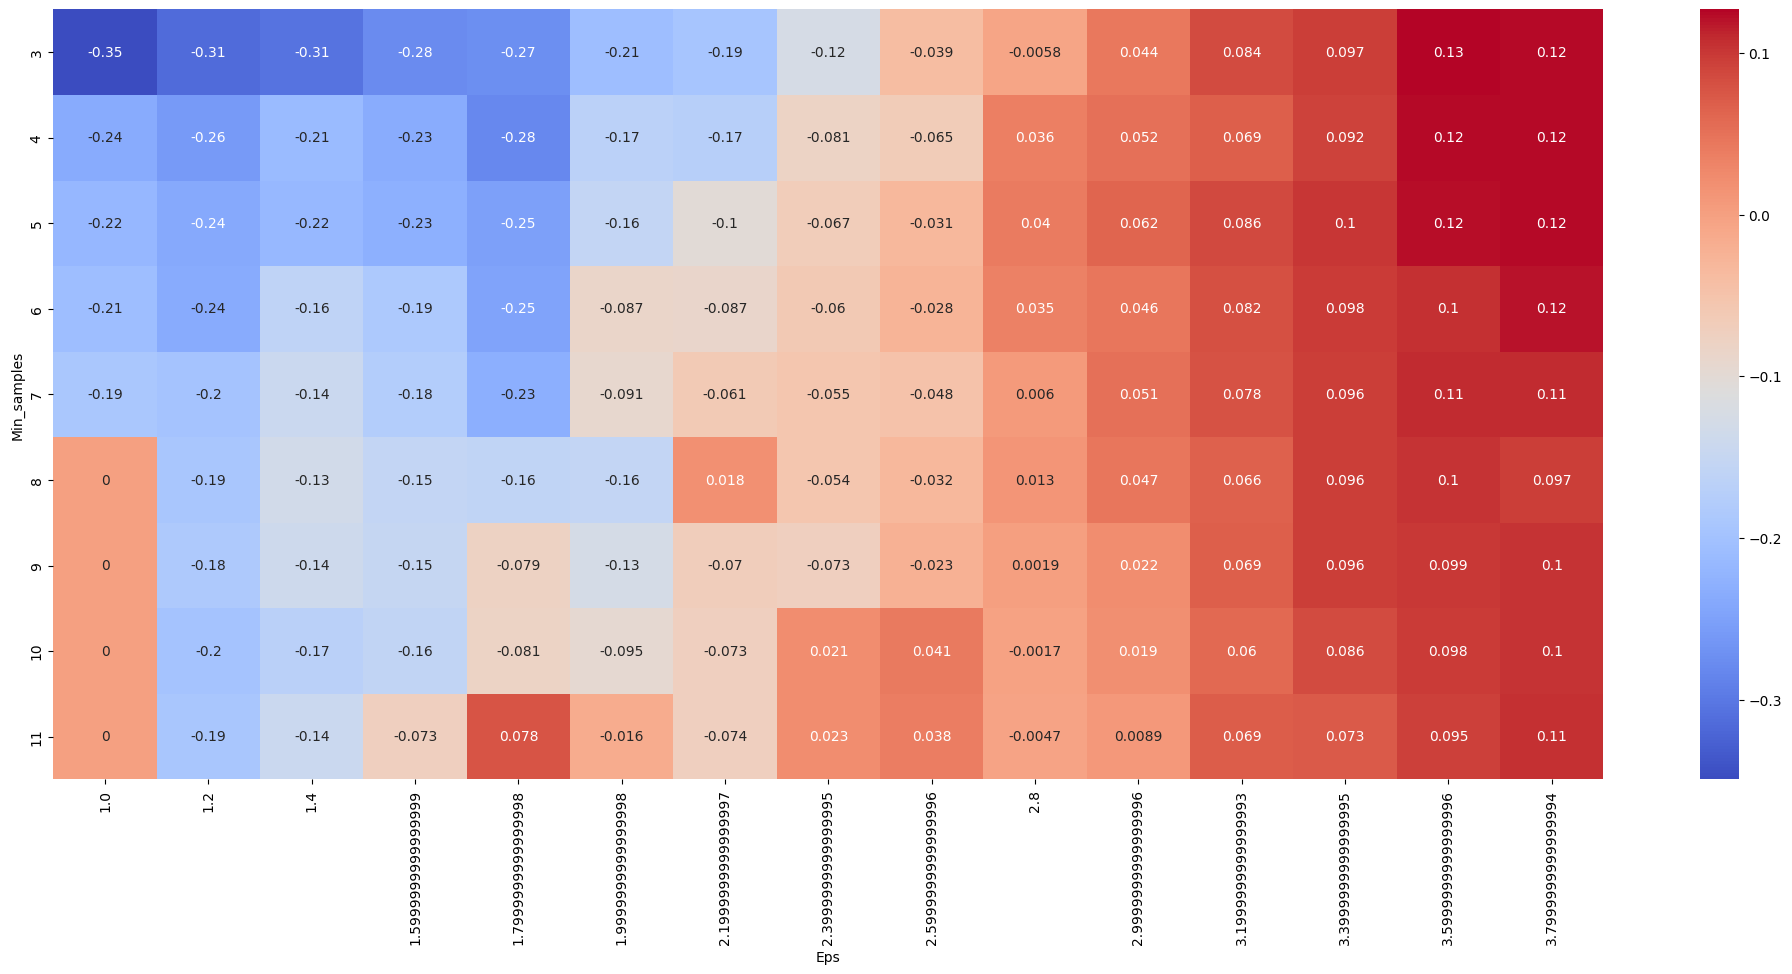

In [137]:
pivot_data = pd.pivot_table(df_paramns_tunning,values='sil_scores',index='Min_samples',columns='Eps')
fig, ax = plt.subplots(figsize = (25,10))
sns.heatmap(pivot_data,annot=True,annot_kws={'size':10}, cmap='coolwarm',ax = ax)
plt.show()

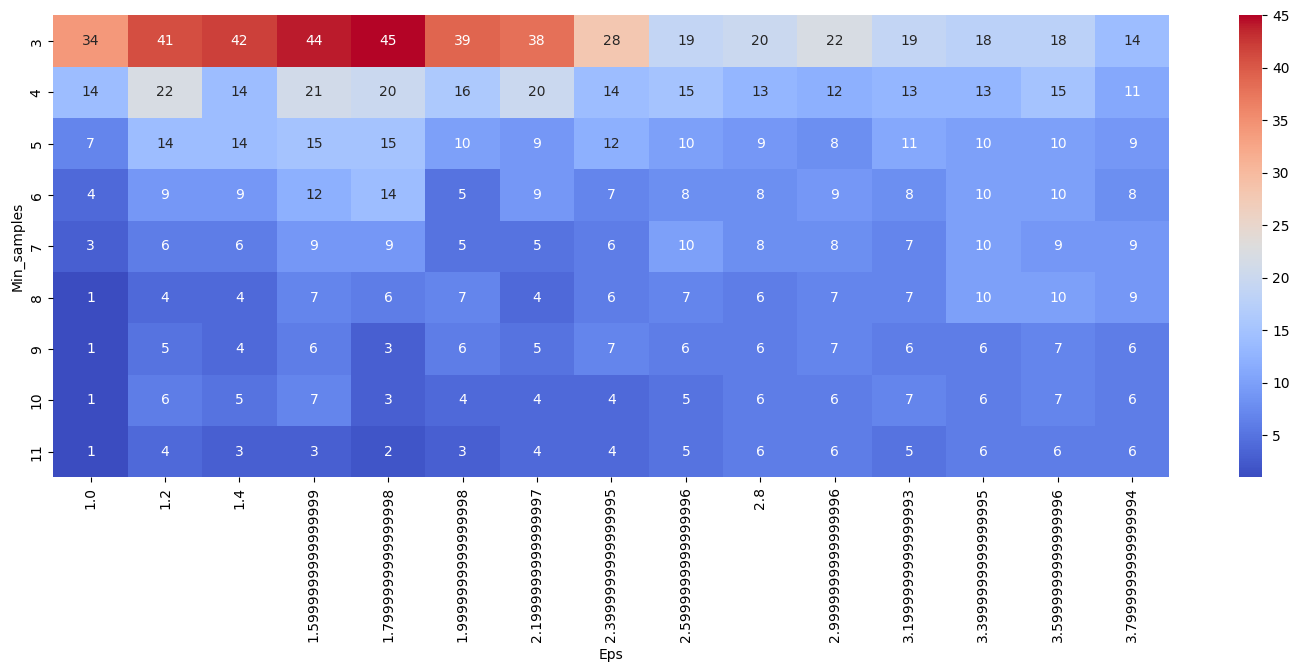

In [138]:
pivot_data = pd.pivot_table(df_paramns_tunning,values='n_clusters',index='Min_samples',columns='Eps')
fig, ax = plt.subplots(figsize = (18,6))
sns.heatmap(pivot_data,annot=True,annot_kws={'size':10}, cmap='coolwarm',ax = ax)
plt.show()

### No se aplica DBSCAN sin PCA porque los resultados son muy malos

In [139]:
df.head() 

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,k_means,hierarchial,k_means_pca,hierarchial_pca
0,1957,2,4,58138.0,0,0,663,58,635,88,...,0,0,0,0,0,1,1,0,1,0
1,1954,2,4,46344.0,1,1,113,38,11,1,...,0,0,0,0,0,0,0,1,0,1
2,1965,2,5,71613.0,0,0,312,26,426,49,...,0,0,0,0,0,0,1,0,1,0
3,1984,2,5,26646.0,1,0,139,26,11,4,...,0,0,0,0,0,0,0,1,0,1
4,1981,4,3,58293.0,1,0,161,94,173,43,...,0,0,0,0,0,0,0,1,0,1


### Podemos ver que el mejor resultado se obtiene con K-means con PCA con 2 clusters y un silhouette score de 0.25 approx

### A continuacion se muestra el resultado de K-means con PCA con 2 clusters para algunos de los atributos

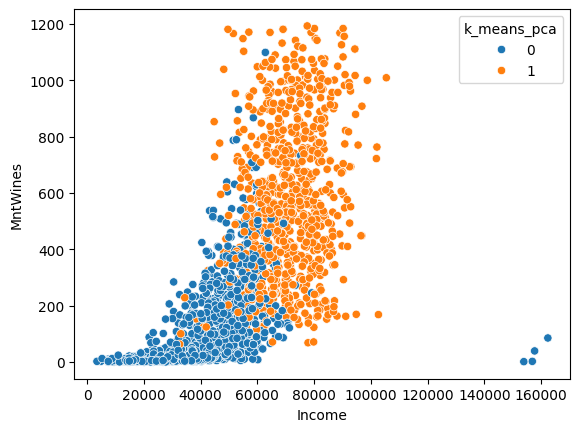

In [141]:
sns.scatterplot(data=df,x='Income',y='MntWines',hue='k_means_pca')
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Income'>

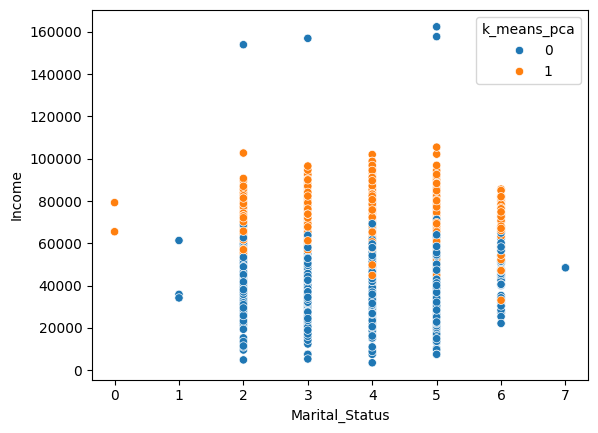

In [143]:
sns.scatterplot(data=df,x="Marital_Status",y="Income",hue='k_means_pca')

In [ ]:
sns.scatterplot(data=df,x="Education",y="Income",hue='k_means_pca')

# Conclusiones
### Se puede ver que hay 2 grupos de clientes con K means con PCA que nos ayudan a ver dos tipos de clientes